# LENDING CLUB LOAN PREDICTION

## Objectives:

- Determine which borrowers are most likely to default with accuracy so that lenders may evaluate credit risk and make well-informed lending decisions.

- Prioritize measures for high-risk borrowers, such as loan restructuring or term adjustments, to minimize financial losses.

- Improve the overall performance of the loan portfolio by directing resource distribution and refining underwriting standards according to default forecasts.


## Importing required libraries and files

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score,accuracy_score, f1_score, confusion_matrix
import optuna
import shap
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import mlflow
import socket
import os
from pathlib import Path
from mlflow.models.signature import infer_signature
import streamlit as st

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [148]:
# Load the dataset
df1 = pd.read_csv(r"C:\Users\sunu\Downloads\lending_club_loan_two.csv\lending_club_loan_two.csv")
print(df1)

        loan_amnt        term  int_rate  installment grade sub_grade  \
0         10000.0   36 months     11.44       329.48     B        B4   
1          8000.0   36 months     11.99       265.68     B        B5   
2         15600.0   36 months     10.49       506.97     B        B3   
3          7200.0   36 months      6.49       220.65     A        A2   
4         24375.0   60 months     17.27       609.33     C        C5   
...           ...         ...       ...          ...   ...       ...   
396025    10000.0   60 months     10.99       217.38     B        B4   
396026    21000.0   36 months     12.29       700.42     C        C1   
396027     5000.0   36 months      9.99       161.32     B        B1   
396028    21000.0   60 months     15.31       503.02     C        C2   
396029     2000.0   36 months     13.61        67.98     C        C2   

                       emp_title emp_length home_ownership  annual_inc  ...  \
0                      Marketing  10+ years           RE

## Exploratory Data Analysis

In [149]:
df1.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,...,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\nNorth Deniseber...
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,...,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\nEast Stephanie, TX..."
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,...,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\nFPO AE 30723
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,...,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\nFPO AP 22690
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,...,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\nMauricestad, VA 00813"


In [150]:
df1.tail(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
396020,10000.0,36 months,9.76,321.55,B,B3,Retirement Counselor,10+ years,RENT,40000.0,...,9.0,0.0,8819.0,57.3,18.0,w,INDIVIDUAL,1.0,0.0,"914 Alexander Mountains Apt. 604\nEast Marco, ..."
396021,3200.0,36 months,5.42,96.52,A,A1,St Francis Medical Center,10+ years,RENT,33000.0,...,18.0,0.0,3985.0,7.6,50.0,f,INDIVIDUAL,NaN,0.0,"309 John Mission\nWest Marc, NY 00813"
396022,12000.0,36 months,12.29,400.24,C,C1,Data Center Specialist II,1 year,RENT,52100.0,...,6.0,0.0,9580.0,66.1,18.0,w,INDIVIDUAL,0.0,0.0,"532 Johnson Drive Apt. 185\nAndersonside, NY 7..."
396023,22000.0,36 months,18.92,805.55,D,D4,Operations Manager,10+ years,MORTGAGE,138000.0,...,18.0,0.0,22287.0,50.4,39.0,f,INDIVIDUAL,4.0,0.0,"0297 Flores Dale Suite 441\nTaylorland, MD 05113"
396024,6000.0,36 months,13.11,202.49,B,B4,Michael's Arts & Crafts,5 years,RENT,64000.0,...,7.0,0.0,11456.0,97.1,9.0,w,INDIVIDUAL,0.0,0.0,"514 Cynthia Park Apt. 402\nWest Williamside, S..."
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."
396029,2000.0,36 months,13.61,67.98,C,C2,Internal Revenue Service,10+ years,RENT,42996.0,...,3.0,0.0,4292.0,91.3,19.0,f,INDIVIDUAL,NaN,0.0,"787 Michelle Causeway\nBriannaton, AR 48052"


In [151]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [152]:
df1.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [153]:
print("\nMissing values in each column:")
print(df1.isnull().sum().sort_values(ascending=False))
total_nulls=df1.isna().sum().sum()
print("total_null_Values=",total_nulls)


Missing values in each column:
mort_acc                37795
emp_title               22927
emp_length              18301
title                    1756
pub_rec_bankruptcies      535
revol_util                276
installment                 0
int_rate                    0
term                        0
grade                       0
loan_amnt                   0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
dti                         0
issue_d                     0
loan_status                 0
purpose                     0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
revol_bal                   0
initial_list_status         0
total_acc                   0
application_type            0
address                     0
dtype: int64
total_null_Values= 81590


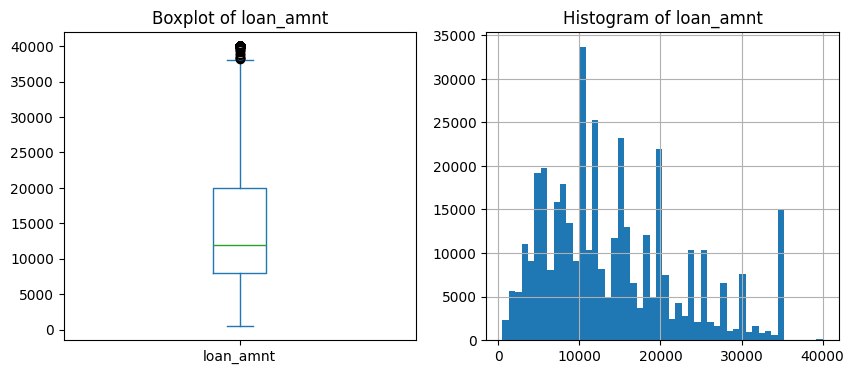

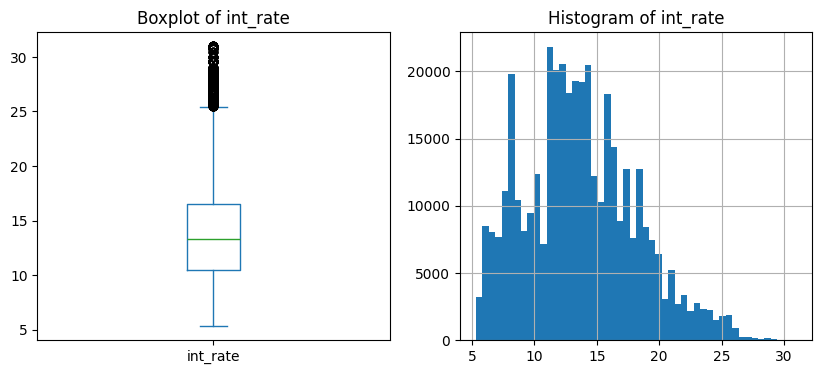

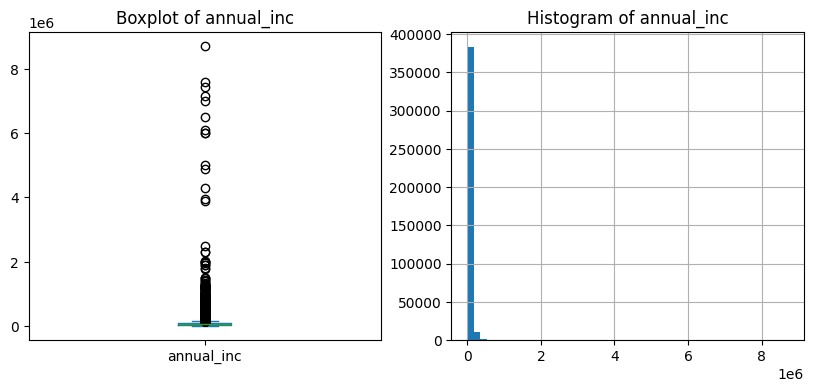

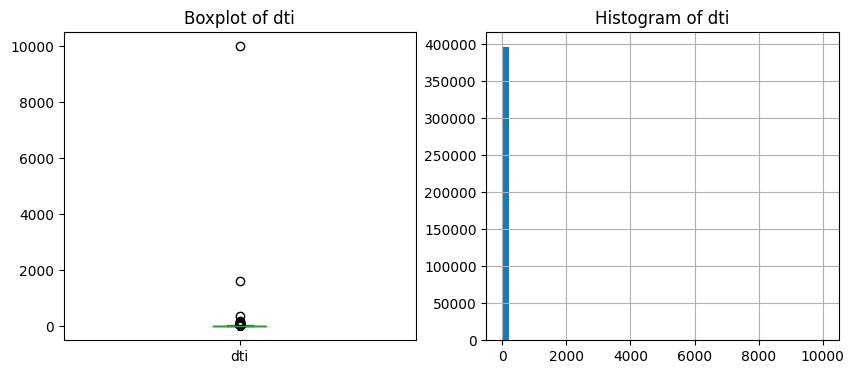

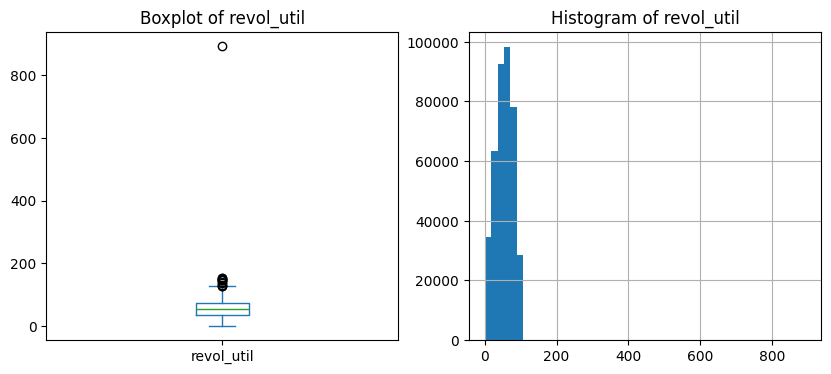

In [154]:
# Checking Outliers
def plot_outliers(column):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    df1[column].plot(kind='box')
    plt.title(f'Boxplot of {column}')
    
    plt.subplot(1, 2, 2)
    df1[column].hist(bins=50)
    plt.title(f'Histogram of {column}')
    plt.show()

numerical_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_util']
for col in numerical_cols:
    plot_outliers(col)

In [155]:
numerical_cols = df1.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols=df1.select_dtypes(include='object').columns.to_list()
print(numerical_cols)
print(categorical_cols)

['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']
['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']


In [156]:
numerical_cols = df1.select_dtypes(include=[np.number]).columns.tolist()


def detect_outliers(column, threshold=1.5):
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    outliers = df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)]
    outlier_percent = (len(outliers)/len(df1)) * 100
    
    return {
        'column': column,
        'outlier_count': len(outliers),
        'outlier_percent': outlier_percent,
        'min': df1[column].min(),
        'max': df1[column].max(),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

outlier_reports = []
for col in numerical_cols:
    outlier_reports.append(detect_outliers(col))
    
outlier_df = pd.DataFrame(outlier_reports)
outlier_df = outlier_df.sort_values('outlier_percent', ascending=False)

print("Outlier Analysis Report:")
print(outlier_df)

Outlier Analysis Report:
                  column  outlier_count  outlier_percent     min         max  \
6                pub_rec          57758        14.584249    0.00       86.00   
11  pub_rec_bankruptcies          45115        11.391814    0.00        8.00   
7              revol_bal          21259         5.368028    0.00  1743266.00   
3             annual_inc          16700         4.216852    0.00  8706582.00   
2            installment          11250         2.840694   16.08     1533.81   
5               open_acc          10307         2.602581    0.00       90.00   
9              total_acc           8499         2.146050    2.00      151.00   
10              mort_acc           6843         1.727899    0.00       34.00   
1               int_rate           3777         0.953716    5.32       30.99   
4                    dti            275         0.069439    0.00     9999.00   
0              loan_amnt            191         0.048229  500.00    40000.00   
8             r

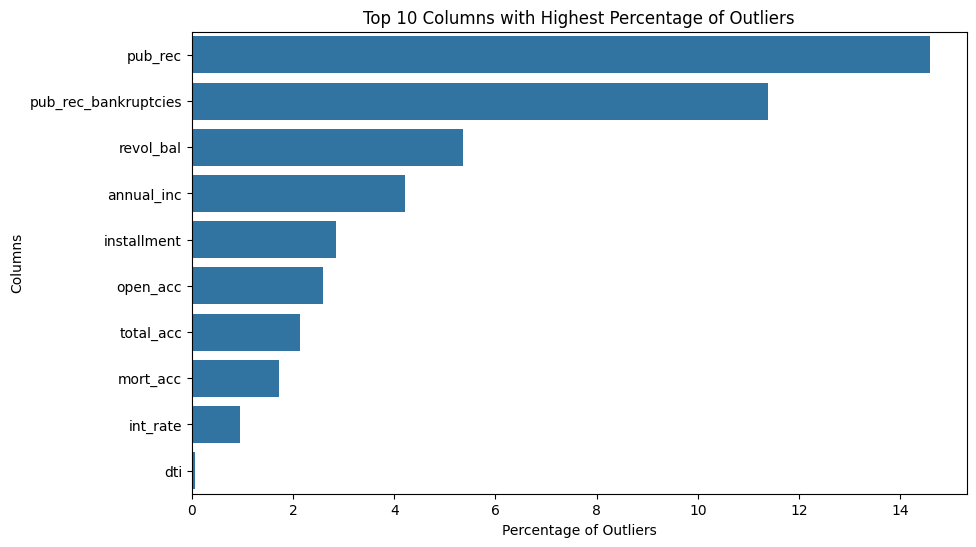

In [157]:
# Top 10 outlier
plt.figure(figsize=(10, 6))
sns.barplot(x='outlier_percent', y='column', data=outlier_df.head(10))
plt.title('Top 10 Columns with Highest Percentage of Outliers')
plt.xlabel('Percentage of Outliers')
plt.ylabel('Columns')
plt.show()

In [158]:
def column(col_stats, outlier_threshold=15):

    high_importance_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'loan_status']
    
    if col_stats['column'] in high_importance_cols:
        return True
    
    if col_stats['outlier_percent'] > outlier_threshold:
        print(f"Warning: {col_stats['column']} has {col_stats['outlier_percent']:.1f}% outliers")

        keep = input(f"Keep {col_stats['column']} despite outliers? (y/n): ").lower() == 'y'
        return keep
    return True

In [159]:
columns_to_keep = []
for _, row in outlier_df.iterrows():
    if column(row):
        columns_to_keep.append(row['column'])

categorical_to_keep = ['term', 'grade', 'purpose', 'home_ownership', 'emp_length','loan_status','emp_title','issue_d']
columns_to_keep.extend(categorical_to_keep)

columns_to_keep = list(set(columns_to_keep))

print("\nSelected Columns to Keep:")
print(columns_to_keep)

df1 = df1[columns_to_keep]
print(df1)


Selected Columns to Keep:
['grade', 'issue_d', 'mort_acc', 'emp_title', 'term', 'total_acc', 'home_ownership', 'open_acc', 'revol_util', 'emp_length', 'int_rate', 'annual_inc', 'purpose', 'installment', 'loan_amnt', 'pub_rec_bankruptcies', 'revol_bal', 'loan_status', 'pub_rec', 'dti']
       grade   issue_d  mort_acc                 emp_title        term  \
0          B  Jan-2015       0.0                 Marketing   36 months   
1          B  Jan-2015       3.0           Credit analyst    36 months   
2          B  Jan-2015       0.0              Statistician   36 months   
3          A  Nov-2014       0.0           Client Advocate   36 months   
4          C  Apr-2013       1.0   Destiny Management Inc.   60 months   
...      ...       ...       ...                       ...         ...   
396025     B  Oct-2015       0.0          licensed bankere   60 months   
396026     C  Feb-2015       1.0                     Agent   36 months   
396027     B  Oct-2013       0.0              C

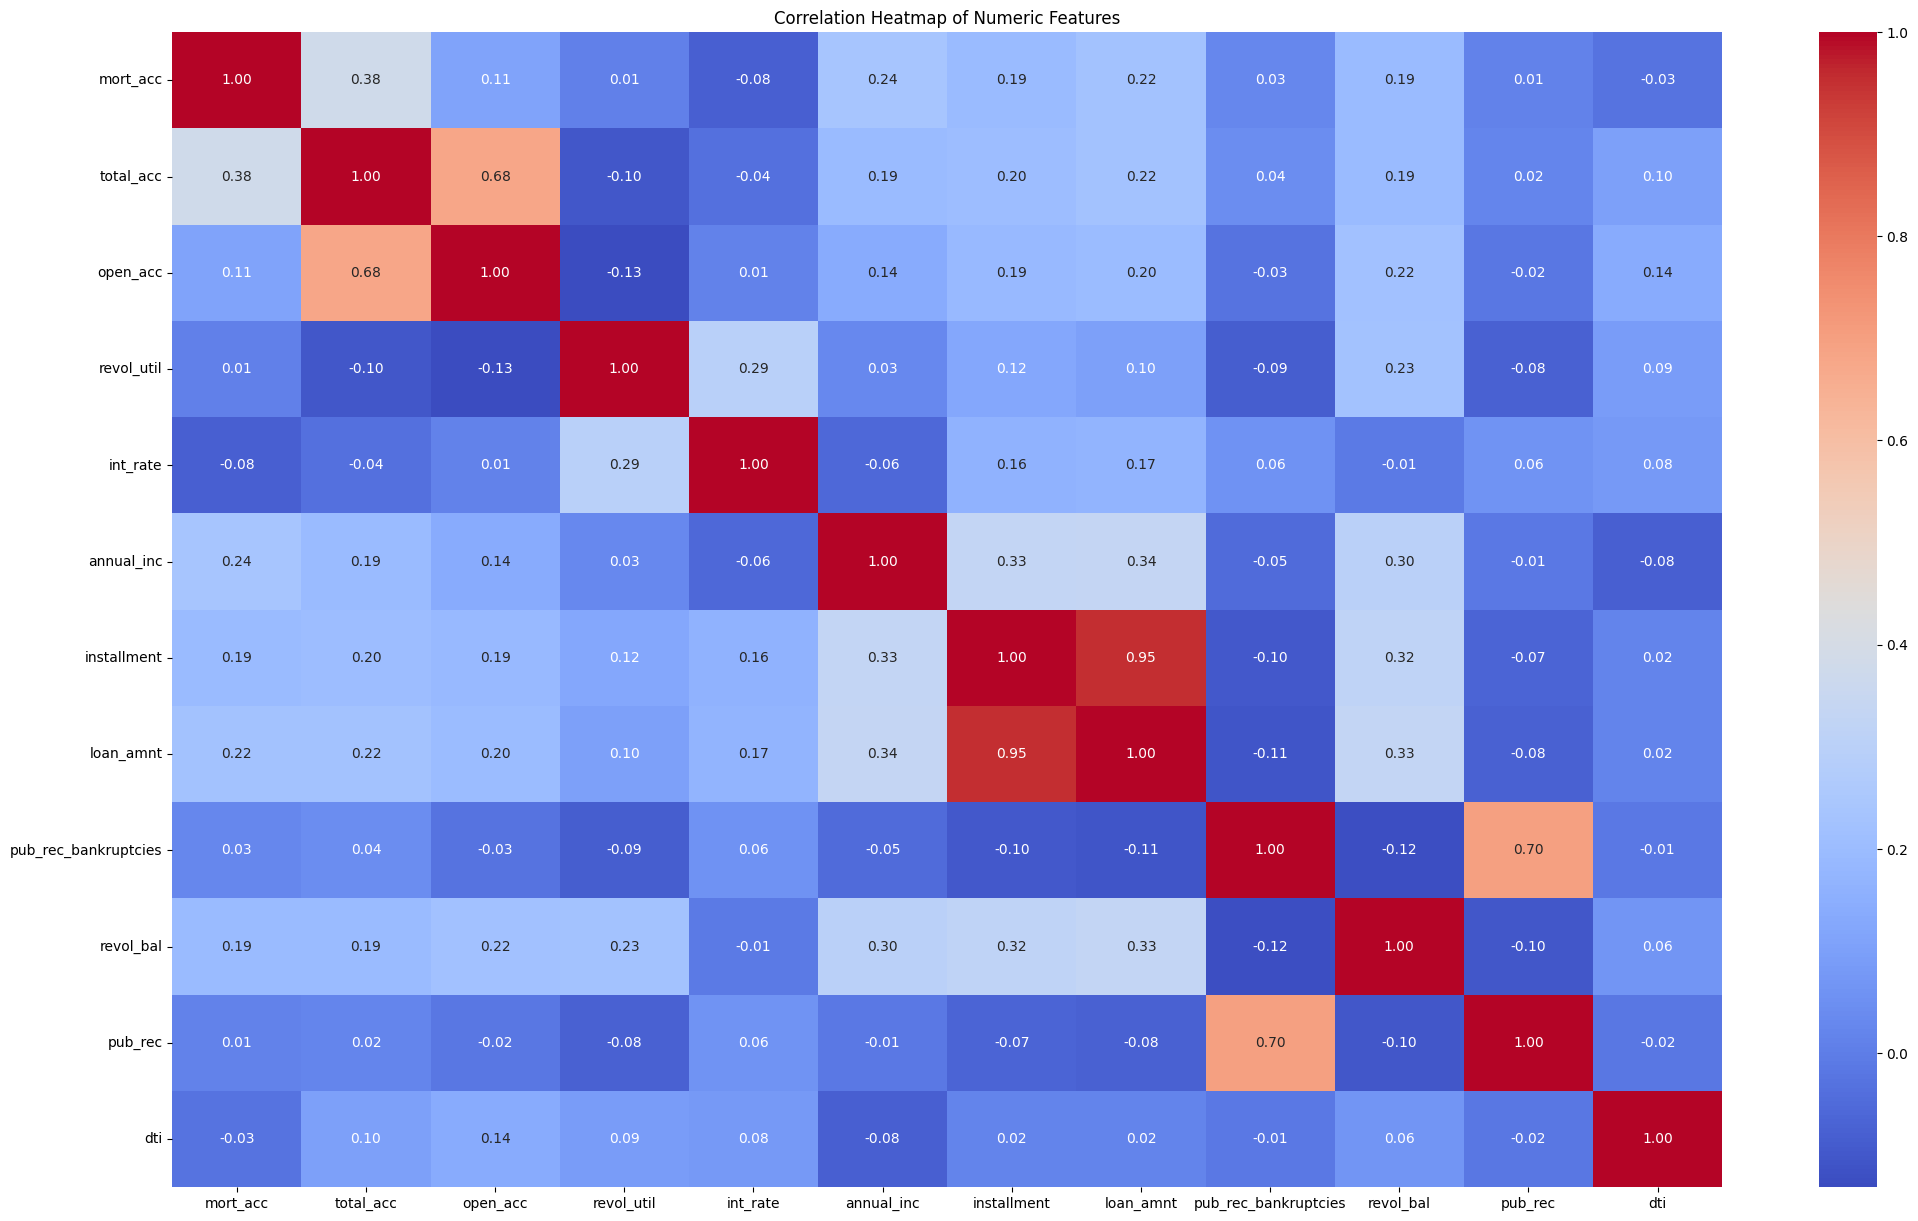

In [160]:
numdf=df1.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(25, 15))
sns.heatmap(numdf.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [161]:
df1

,grade,issue_d,mort_acc,emp_title,term,total_acc,home_ownership,open_acc,revol_util,emp_length,int_rate,annual_inc,purpose,installment,loan_amnt,pub_rec_bankruptcies,revol_bal,loan_status,pub_rec,dti
0,B,Jan-2015,0.0,Marketing,36 months,25.0,RENT,16.0,41.8,10+ years,11.44,117000.0,vacation,329.48,10000.0,0.0,36369.0,Fully Paid,0.0,26.24
1,B,Jan-2015,3.0,Credit analyst,36 months,27.0,MORTGAGE,17.0,53.3,4 years,11.99,65000.0,debt_consolidation,265.68,8000.0,0.0,20131.0,Fully Paid,0.0,22.05
2,B,Jan-2015,0.0,Statistician,36 months,26.0,RENT,13.0,92.2,< 1 year,10.49,43057.0,credit_card,506.97,15600.0,0.0,11987.0,Fully Paid,0.0,12.79
3,A,Nov-2014,0.0,Client Advocate,36 months,13.0,RENT,6.0,21.5,6 years,6.49,54000.0,credit_card,220.65,7200.0,0.0,5472.0,Fully Paid,0.0,2.60
4,C,Apr-2013,1.0,Destiny Management Inc.,60 months,43.0,MORTGAGE,13.0,69.8,9 years,17.27,55000.0,credit_card,609.33,24375.0,0.0,24584.0,Charged Off,0.0,33.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,B,Oct-2015,0.0,licensed bankere,60 months,23.0,RENT,6.0,34.3,2 years,10.99,40000.0,debt_consolidation,217.38,10000.0,0.0,1990.0,Fully Paid,0.0,15.63
396026,C,Feb-2015,1.0,Agent,36 months,8.0,MORTGAGE,6.0,95.7,5 years,12.29,110000.0,debt_consolidation,700.42,21000.0,0.0,43263.0,Fully Paid,0.0,21.45
396027,B,Oct-2013,0.0,City Carrier,36 months,23.0,RENT,15.0,66.9,10+ years,9.99,56500.0,debt_consolidation,161.32,5000.0,0.0,32704.0,Fully Paid,0.0,17.56
396028,C,Aug-2012,5.0,"Gracon Services, Inc",60 months,20.0,MORTGAGE,9.0,53.8,10+ years,15.31,64000.0,debt_consolidation,503.02,21000.0,0.0,15704.0,Fully Paid,0.0,15.88


In [162]:
df1['loan_status'].head(10)

0     Fully Paid
1     Fully Paid
2     Fully Paid
3     Fully Paid
4    Charged Off
5     Fully Paid
6     Fully Paid
7     Fully Paid
8     Fully Paid
9     Fully Paid
Name: loan_status, dtype: object

In [163]:
print(df1.isnull().sum().sort_values(ascending=False))

mort_acc                37795
emp_title               22927
emp_length              18301
pub_rec_bankruptcies      535
revol_util                276
issue_d                     0
grade                       0
term                        0
open_acc                    0
home_ownership              0
int_rate                    0
total_acc                   0
annual_inc                  0
purpose                     0
installment                 0
loan_amnt                   0
revol_bal                   0
loan_status                 0
pub_rec                     0
dti                         0
dtype: int64


In [164]:
df1.dtypes

grade                    object
issue_d                  object
mort_acc                float64
emp_title                object
term                     object
total_acc               float64
home_ownership           object
open_acc                float64
revol_util              float64
emp_length               object
int_rate                float64
annual_inc              float64
purpose                  object
installment             float64
loan_amnt               float64
pub_rec_bankruptcies    float64
revol_bal               float64
loan_status              object
pub_rec                 float64
dti                     float64
dtype: object

In [165]:
df1.loc[df1['home_ownership'] == 'RENT', 'mort_acc'] = \
    df1.loc[df1['home_ownership'] == 'RENT', 'mort_acc'].fillna(0)

df1['mort_acc'] = df1.groupby('home_ownership')['mort_acc']\
                  .transform(lambda x: x.fillna(x.median()))


emp_length_map = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

df1['emp_length'] = df1['emp_length'].replace(emp_length_map)
df1['emp_length'] = df1['emp_length'].fillna(df1['emp_length'].median())

df1['revol_util'] = df1['revol_util'].fillna(df1['revol_util'].median())

# Display null counts after filling
print("\nNull values after handling:")
print(df1.isnull().sum())


Null values after handling:
grade                       0
issue_d                     0
mort_acc                    0
emp_title               22927
term                        0
total_acc                   0
home_ownership              0
open_acc                    0
revol_util                  0
emp_length                  0
int_rate                    0
annual_inc                  0
purpose                     0
installment                 0
loan_amnt                   0
pub_rec_bankruptcies      535
revol_bal                   0
loan_status                 0
pub_rec                     0
dti                         0
dtype: int64


In [166]:
df1.drop(['pub_rec_bankruptcies','purpose','pub_rec','emp_title','issue_d'], axis=1, inplace=True)
df1

,grade,mort_acc,term,total_acc,home_ownership,open_acc,revol_util,emp_length,int_rate,annual_inc,installment,loan_amnt,revol_bal,loan_status,dti
0,B,0.0,36 months,25.0,RENT,16.0,41.8,10.0,11.44,117000.0,329.48,10000.0,36369.0,Fully Paid,26.24
1,B,3.0,36 months,27.0,MORTGAGE,17.0,53.3,4.0,11.99,65000.0,265.68,8000.0,20131.0,Fully Paid,22.05
2,B,0.0,36 months,26.0,RENT,13.0,92.2,0.0,10.49,43057.0,506.97,15600.0,11987.0,Fully Paid,12.79
3,A,0.0,36 months,13.0,RENT,6.0,21.5,6.0,6.49,54000.0,220.65,7200.0,5472.0,Fully Paid,2.60
4,C,1.0,60 months,43.0,MORTGAGE,13.0,69.8,9.0,17.27,55000.0,609.33,24375.0,24584.0,Charged Off,33.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,B,0.0,60 months,23.0,RENT,6.0,34.3,2.0,10.99,40000.0,217.38,10000.0,1990.0,Fully Paid,15.63
396026,C,1.0,36 months,8.0,MORTGAGE,6.0,95.7,5.0,12.29,110000.0,700.42,21000.0,43263.0,Fully Paid,21.45
396027,B,0.0,36 months,23.0,RENT,15.0,66.9,10.0,9.99,56500.0,161.32,5000.0,32704.0,Fully Paid,17.56
396028,C,5.0,60 months,20.0,MORTGAGE,9.0,53.8,10.0,15.31,64000.0,503.02,21000.0,15704.0,Fully Paid,15.88


In [167]:
df1

,grade,mort_acc,term,total_acc,home_ownership,open_acc,revol_util,emp_length,int_rate,annual_inc,installment,loan_amnt,revol_bal,loan_status,dti
0,B,0.0,36 months,25.0,RENT,16.0,41.8,10.0,11.44,117000.0,329.48,10000.0,36369.0,Fully Paid,26.24
1,B,3.0,36 months,27.0,MORTGAGE,17.0,53.3,4.0,11.99,65000.0,265.68,8000.0,20131.0,Fully Paid,22.05
2,B,0.0,36 months,26.0,RENT,13.0,92.2,0.0,10.49,43057.0,506.97,15600.0,11987.0,Fully Paid,12.79
3,A,0.0,36 months,13.0,RENT,6.0,21.5,6.0,6.49,54000.0,220.65,7200.0,5472.0,Fully Paid,2.60
4,C,1.0,60 months,43.0,MORTGAGE,13.0,69.8,9.0,17.27,55000.0,609.33,24375.0,24584.0,Charged Off,33.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,B,0.0,60 months,23.0,RENT,6.0,34.3,2.0,10.99,40000.0,217.38,10000.0,1990.0,Fully Paid,15.63
396026,C,1.0,36 months,8.0,MORTGAGE,6.0,95.7,5.0,12.29,110000.0,700.42,21000.0,43263.0,Fully Paid,21.45
396027,B,0.0,36 months,23.0,RENT,15.0,66.9,10.0,9.99,56500.0,161.32,5000.0,32704.0,Fully Paid,17.56
396028,C,5.0,60 months,20.0,MORTGAGE,9.0,53.8,10.0,15.31,64000.0,503.02,21000.0,15704.0,Fully Paid,15.88


## Feature Engineering

In [168]:
# Income to loan Ratio
df1['income_to_loan']=df1['annual_inc'] / df1['loan_amnt']

#Debt-to-Income Adjusted Utilization
df1['dti_util'] = df1['dti'] * (df1['revol_util'] / 100)

In [169]:
df1

,grade,mort_acc,term,total_acc,home_ownership,open_acc,revol_util,emp_length,int_rate,annual_inc,installment,loan_amnt,revol_bal,loan_status,dti,income_to_loan,dti_util
0,B,0.0,36 months,25.0,RENT,16.0,41.8,10.0,11.44,117000.0,329.48,10000.0,36369.0,Fully Paid,26.24,11.700000,10.96832
1,B,3.0,36 months,27.0,MORTGAGE,17.0,53.3,4.0,11.99,65000.0,265.68,8000.0,20131.0,Fully Paid,22.05,8.125000,11.75265
2,B,0.0,36 months,26.0,RENT,13.0,92.2,0.0,10.49,43057.0,506.97,15600.0,11987.0,Fully Paid,12.79,2.760064,11.79238
3,A,0.0,36 months,13.0,RENT,6.0,21.5,6.0,6.49,54000.0,220.65,7200.0,5472.0,Fully Paid,2.60,7.500000,0.55900
4,C,1.0,60 months,43.0,MORTGAGE,13.0,69.8,9.0,17.27,55000.0,609.33,24375.0,24584.0,Charged Off,33.95,2.256410,23.69710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,B,0.0,60 months,23.0,RENT,6.0,34.3,2.0,10.99,40000.0,217.38,10000.0,1990.0,Fully Paid,15.63,4.000000,5.36109
396026,C,1.0,36 months,8.0,MORTGAGE,6.0,95.7,5.0,12.29,110000.0,700.42,21000.0,43263.0,Fully Paid,21.45,5.238095,20.52765
396027,B,0.0,36 months,23.0,RENT,15.0,66.9,10.0,9.99,56500.0,161.32,5000.0,32704.0,Fully Paid,17.56,11.300000,11.74764
396028,C,5.0,60 months,20.0,MORTGAGE,9.0,53.8,10.0,15.31,64000.0,503.02,21000.0,15704.0,Fully Paid,15.88,3.047619,8.54344


In [170]:
status_counts = df1['loan_status'].value_counts()

print("Loan Status Counts:")
print(status_counts)

fully_paid = (df1['loan_status'] == 'Fully Paid').sum()
charged_off = (df1['loan_status'] == 'Charged Off').sum()

print(f"\nFully Paid: {fully_paid} loans")
print(f"Charged Off: {charged_off} loans")

Loan Status Counts:
loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

Fully Paid: 318357 loans
Charged Off: 77673 loans


## Encoding categorical variables using target encoding

In [171]:
cols=df1.select_dtypes(include=['category','object']).columns
encoder= ce.TargetEncoder(col)
for col in cols:
    df1[col]=encoder.fit_transform(df1[col],df1['loan_status'])

In [172]:
df1

,grade,mort_acc,term,total_acc,home_ownership,open_acc,revol_util,emp_length,int_rate,annual_inc,installment,loan_amnt,revol_bal,loan_status,dti,income_to_loan,dti_util
0,0.874270,0.0,0.842254,25.0,0.773378,16.0,41.8,10.0,11.44,117000.0,329.48,10000.0,36369.0,1.0,26.24,11.700000,10.96832
1,0.874270,3.0,0.842254,27.0,0.830439,17.0,53.3,4.0,11.99,65000.0,265.68,8000.0,20131.0,1.0,22.05,8.125000,11.75265
2,0.874270,0.0,0.842254,26.0,0.773378,13.0,92.2,0.0,10.49,43057.0,506.97,15600.0,11987.0,1.0,12.79,2.760064,11.79238
3,0.937121,0.0,0.842254,13.0,0.773378,6.0,21.5,6.0,6.49,54000.0,220.65,7200.0,5472.0,1.0,2.60,7.500000,0.55900
4,0.788191,1.0,0.680585,43.0,0.830439,13.0,69.8,9.0,17.27,55000.0,609.33,24375.0,24584.0,0.0,33.95,2.256410,23.69710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0.874270,0.0,0.680585,23.0,0.773378,6.0,34.3,2.0,10.99,40000.0,217.38,10000.0,1990.0,1.0,15.63,4.000000,5.36109
396026,0.788191,1.0,0.842254,8.0,0.830439,6.0,95.7,5.0,12.29,110000.0,700.42,21000.0,43263.0,1.0,21.45,5.238095,20.52765
396027,0.874270,0.0,0.842254,23.0,0.773378,15.0,66.9,10.0,9.99,56500.0,161.32,5000.0,32704.0,1.0,17.56,11.300000,11.74764
396028,0.788191,5.0,0.680585,20.0,0.830439,9.0,53.8,10.0,15.31,64000.0,503.02,21000.0,15704.0,1.0,15.88,3.047619,8.54344


In [173]:
df1['loan_status'].head(10)

0    1.0
1    1.0
2    1.0
3    1.0
4    0.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: loan_status, dtype: float64

## Dealing with class imbalance using SMOTE and ADASYN

In [174]:
x = df1.drop('loan_status', axis=1)
y=df1['loan_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

adasyn = ADASYN(random_state=42)
x_train_res_adasyn, y_train_res_adasyn = adasyn.fit_resample(x_train, y_train)

print("Before Resampling:", y_train.value_counts())
print("After Resampling SMOTE:", y_train_res.value_counts())
print("After Resampling ADASYN:", y_train_res_adasyn.value_counts())

Before Resampling: loan_status
1.0    254728
0.0     62096
Name: count, dtype: int64
After Resampling SMOTE: loan_status
1.0    254728
0.0    254728
Name: count, dtype: int64
After Resampling ADASYN: loan_status
1.0    254728
0.0    247803
Name: count, dtype: int64


## Model Training and Evaluation

In [175]:
# STRATIFIED K FOLD
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [176]:
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), {
        "C": [0.01, 0.1, 1, 10]
    }),
    "Random Forest": (RandomForestClassifier(random_state=42), {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20]
    }),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1],
        "max_depth": [3, 6]
    }),
    "LightGBM": (LGBMClassifier(random_state=42), {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1],
        "num_leaves": [31, 64]
    })
}

In [177]:
# Defining models 
models = {
    "Logistic Regression": LogisticRegression(C=1, max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3,
                             use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100, learning_rate=0.1, num_leaves=31, random_state=42)
}

results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    model.fit(x_train_res, y_train_res)

    y_train_pred = model.predict(x_train_res)
    y_test_pred = model.predict(x_test)

    train_accuracy =accuracy_score(y_train_res, y_train_pred)
    test_accuracy =accuracy_score(y_test, y_test_pred)

    results[model_name] = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy
    }

print("\nModel Performance:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Train Accuracy: {metrics['Train Accuracy']:.4f}")
    print(f"Test Accuracy: {metrics['Test Accuracy']:.4f}")

Training Logistic Regression...
Training Random Forest...
Training XGBoost...
Training LightGBM...
[LightGBM] [Info] Number of positive: 254728, number of negative: 254728
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 509456, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Model Performance:

Logistic Regression:
Train Accuracy: 0.6493
Test Accuracy: 0.6256

Random Forest:
Train Accuracy: 1.0000
Test Accuracy: 0.7997

XGBoost:
Train Accuracy: 0.8629
Test Accuracy: 0.7981

LightGBM:
Train Accuracy: 0.8795
Test Accuracy: 0.8050


## Optimizing using Optuna

In [178]:
# def objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 500),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'num_leaves': trial.suggest_int('num_leaves', 31, 128),
#         'max_depth': trial.suggest_int('max_depth', 3, 12),
#         'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0)
#     }

#     model = LGBMClassifier(**params, random_state=42)
#     f1 = cross_val_score(model, x_train_res, y_train_res, cv=StratifiedKFold(n_splits=5),
#                          scoring=make_scorer(f1_score)).mean()
#     return f1

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50, timeout=600)  # You can increase n_trials

# print("Best F1 Score:", study.best_value)
# print("Best Parameters:", study.best_params)

In [179]:
best_params={'n_estimators': 468, 'learning_rate': 0.2263869286404703, 'num_leaves': 109, 'max_depth': 3, 'min_child_samples': 89, 'subsample': 0.8918982941176306, 'colsample_bytree': 0.7012214782661352, 'reg_alpha': 0.9421197248005847, 'reg_lambda': 0.21210880030027635}
model_optuna = LGBMClassifier(**best_params, random_state=42)
model_optuna.fit(x_train_res, y_train_res)

[LightGBM] [Info] Number of positive: 254728, number of negative: 254728
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046970 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 509456, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

LGBMClassifier(colsample_bytree=0.7012214782661352,
               learning_rate=0.2263869286404703, max_depth=3,
               min_child_samples=89, n_estimators=468, num_leaves=109,
               random_state=42, reg_alpha=0.9421197248005847,
               reg_lambda=0.21210880030027635, subsample=0.8918982941176306)

In [180]:
y_pred = model_optuna.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.55      0.09      0.15     15577
         1.0       0.82      0.98      0.89     63629

    accuracy                           0.81     79206
   macro avg       0.68      0.54      0.52     79206
weighted avg       0.76      0.81      0.75     79206



In [181]:
y_pred = model_optuna.predict(x_test)
acc_optuna = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc_optuna:.4f}")

Accuracy: 0.8066


## Applying SHAP (SHapley Additive exPlanations) to explain predictions

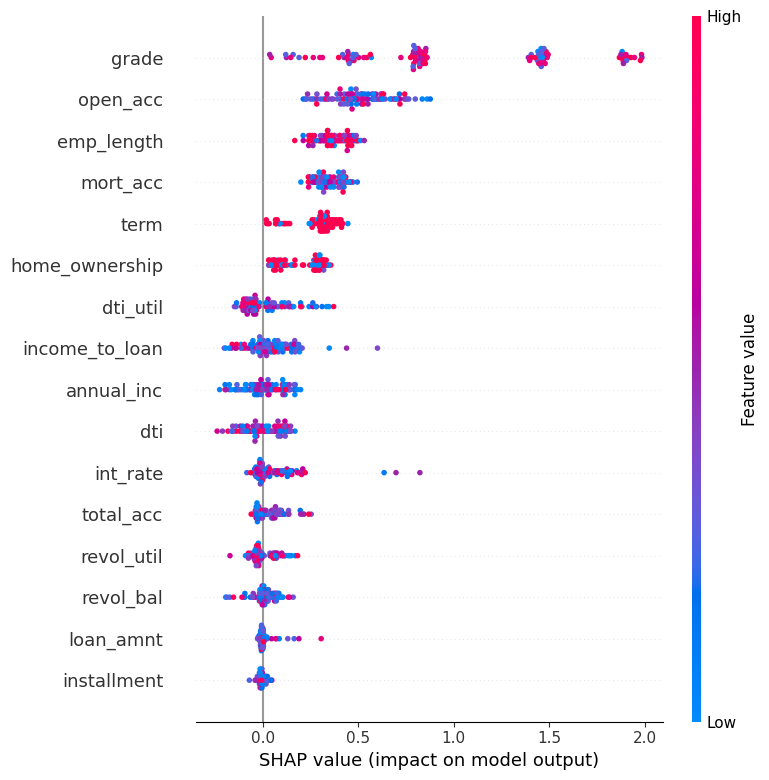

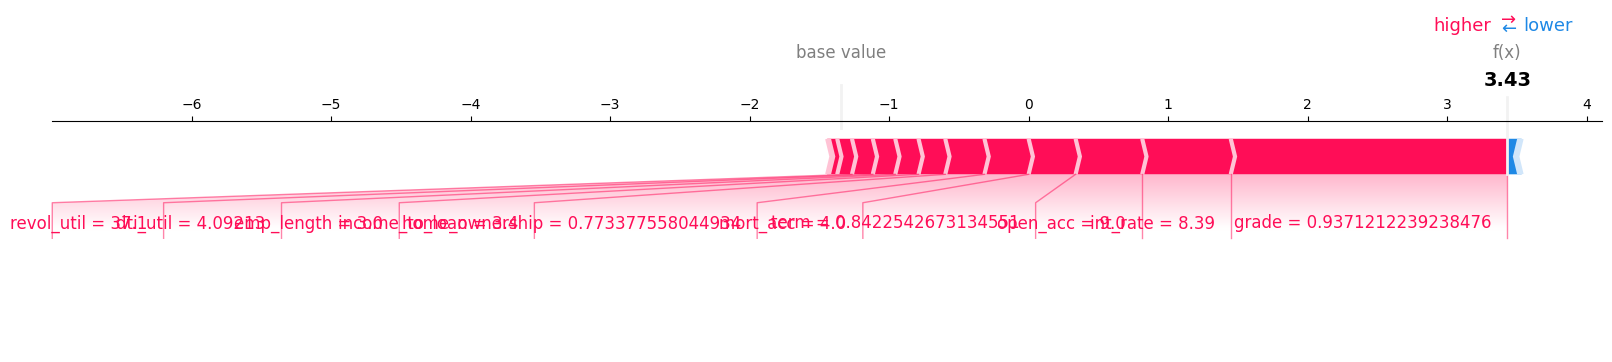

In [182]:
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train.sample(100))  # use a sample for speed
shap.summary_plot(shap_values, x_train.sample(100))

i = 0  # index of sample to explain
shap.force_plot(explainer.expected_value, shap_values[i], x_train.iloc[i], matplotlib=True)

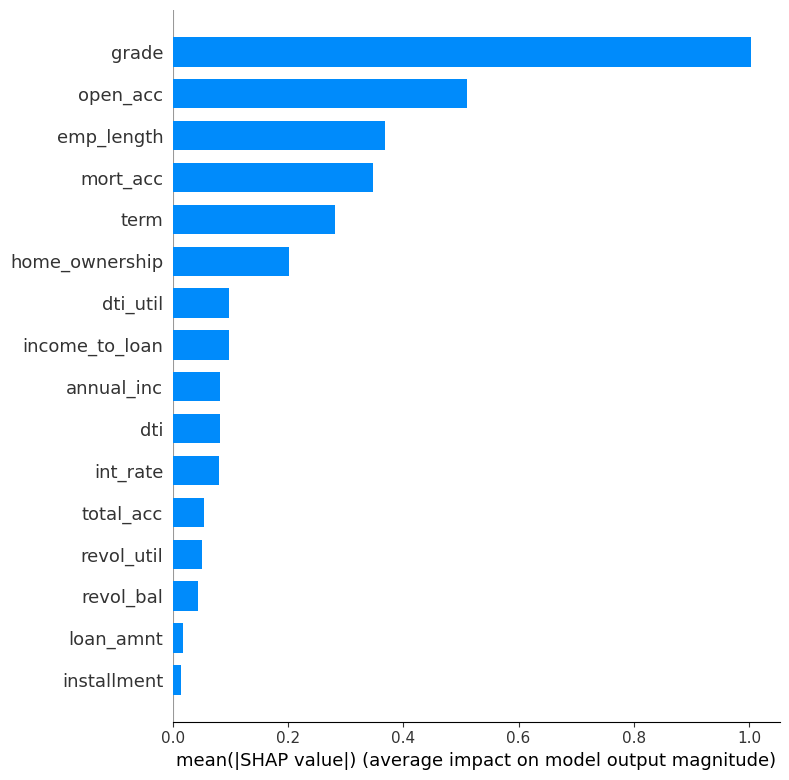

In [183]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

## Pipeline & model versioning with MLflow

In [184]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")  

experiment_name = "Loan_Default_Prediction_SQLite"
try:
    experiment_id = mlflow.create_experiment(experiment_name)
except mlflow.exceptions.MlflowException:
    experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id
mlflow.set_experiment(experiment_name)


with mlflow.start_run(run_name="LGBM_Optuna_SQLite"):
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("lgbm", LGBMClassifier(**best_params, random_state=42))
    ])
    
    pipeline.fit(x_train_res, y_train_res)
    
    y_pred = pipeline.predict(x_test)
    y_proba = pipeline.predict_proba(x_test)[:, 1]
    
    metrics = {
        "roc_auc": roc_auc_score(y_test, y_proba),
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision'],
        "recall": classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall']
    }
    
    mlflow.log_params(best_params)
    mlflow.log_metrics(metrics)
    
   
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_path = "classification_report.csv"
    report_df.to_csv(report_path)
    mlflow.log_artifact(report_path)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title("Confusion Matrix")
    confusion_path = "confusion_matrix.png"
    plt.savefig(confusion_path)
    plt.close()
    mlflow.log_artifact(confusion_path)
    
    plt.figure(figsize=(10, 6))
    feature_importances = pipeline.named_steps['lgbm'].feature_importances_
    features = x_train_res.columns if hasattr(x_train_res, 'columns') else range(len(feature_importances))
    pd.Series(feature_importances, index=features).sort_values().plot(kind='barh')
    plt.title("Feature Importances")
    importance_path = "feature_importance.png"
    plt.savefig(importance_path)
    plt.close()
    mlflow.log_artifact(importance_path)
    
    signature = infer_signature(x_train_res, y_pred)
    
    mlflow.sklearn.log_model(
    sk_model=pipeline,
    artifact_path="model",
    registered_model_name="LGBM_Loan_Default_SQLite",  
    signature=signature
    )
    
    # Step to run in terminal  after creating the mlflow 
    print("mlflow ui --backend-store-uri sqlite:///mlflow.db --port 5000")
    print("http://localhost:5000  ")

# Clean up temporary files
for f in [report_path, confusion_path, importance_path]:
    if os.path.exists(f):
        os.remove(f)

[LightGBM] [Info] Number of positive: 254728, number of negative: 254728
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 509456, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

2025/07/15 12:09:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/15 12:12:11 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\sunu\AppData\Local\Temp\tmpgpnw3my3\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.6.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
Registered model 'LGBM_Loan_Default_SQLite' already exists. Creating a new version of this model...
Created version '4' of model 'LGBM_Loan_Default_SQLite'.


mlflow ui --backend-store-uri sqlite:///mlflow.db --port 5000
http://localhost:5000  


## Streamlit dashboard for loan officers to view prediction  and explanation

In [ ]:
%%writefile loan_dashboard.py
import streamlit as st
import pandas as pd
import shap
import mlflow
import matplotlib.pyplot as plt
import numpy as np
from mlflow.tracking import MlflowClient

mlflow.set_tracking_uri("sqlite:///mlflow.db")

@st.cache_resource
def load_model():
    try:
        model = mlflow.sklearn.load_model("models:/LGBM_Loan_Default_SQLite/latest")
        return model
    except Exception as e:
        st.error(f"Model loading failed: {str(e)}")
        return None

model = load_model()

st.title("Loan Default Prediction Dashboard")
st.markdown("""
**Instructions:**  
1. Fill in applicant details  
2. View prediction and SHAP explanation  
""")

with st.form("applicant_form"):
    st.subheader("Enter Applicant Information")

    grade_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
    home_ownership_map = {'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3}
    
    col1, col2 = st.columns(2)
    with col1:
        loan_amnt = st.number_input("Loan Amount", 1000, 40000, 15000)
        grade = st.selectbox("Grade", list(grade_map.keys()))
        mort_acc = st.number_input("Number of Mortgage Accounts", 0, 50, 2)
        term = st.selectbox("Loan Term", ["36 months", "60 months"])
        total_acc = st.number_input("Total Credit Accounts", 0, 100, 30)
        home_ownership = st.selectbox("Home Ownership", list(home_ownership_map.keys()))
        open_acc = st.number_input("Open Credit Lines", 0, 100, 10)
        revol_util = st.number_input("Revolving Utilization (%)", 0.0, 150.0, 30.0)
        emp_length = st.number_input("Employment Length (Years)", 0, 50, 5)

    with col2:
        int_rate = st.number_input("Interest Rate (%)", 5.0, 30.0, 12.5)
        annual_inc = st.number_input("Annual Income", 10000, 500000, 60000)
        installment = st.number_input("Installment Amount", 0.0, 2000.0, 400.0)
        revol_bal = st.number_input("Revolving Balance", 0.0, 500000.0, 15000.0)
        dti = st.number_input("Debt-to-Income Ratio", 0.0, 50.0, 15.0)
        income_to_loan = st.number_input("Income-to-Loan Ratio", 0.0, 20.0, 3.0)
        dti_util = st.number_input("DTI Utilization", 0.0, 10.0, 1.5)

    submitted = st.form_submit_button("Get Prediction")

# SHAP
if submitted and model is not None:
    feature_names = [
        "grade", "mort_acc", "term", "total_acc", "home_ownership",
        "open_acc", "revol_util", "emp_length", "int_rate", "annual_inc",
        "installment", "loan_amnt", "revol_bal", "dti", "income_to_loan", "dti_util"
    ]
    
    input_df = pd.DataFrame([[
        grade_map[grade],
        mort_acc,
        36.0 if term == "36 months" else 60.0,
        total_acc,
        home_ownership_map[home_ownership],
        open_acc,
        revol_util,
        emp_length,
        int_rate,
        annual_inc,
        installment,
        loan_amnt,
        revol_bal,
        dti,
        income_to_loan,
        dti_util
    ]], columns=feature_names).astype("float64")

    prediction = model.predict(input_df)[0]
    try:
        proba = model.predict_proba(input_df)[0][1]
    except:
        proba = None
    
    #results
    st.subheader("Prediction Result")
    if prediction == 0:  
        st.error(f"CHARGED OFF (Default Probability: {proba:.1%})" if proba else "CHARGED OFF")
    else:
        st.success(f"FULLY PAID (Default Probability: {proba:.1%})" if proba else "FULLY PAID")

    st.subheader("Explanation")
    try:
        lgbm_model = model.named_steps['lgbm']
        
        scaled_input = model.named_steps['scaler'].transform(input_df)
        
        explainer = shap.TreeExplainer(lgbm_model)
        shap_values = explainer.shap_values(scaled_input)
        
        plt.figure(figsize=(10, 8))
        shap.summary_plot(shap_values, scaled_input, feature_names=feature_names, plot_type="bar", show=False)
        plt.tight_layout()
        st.pyplot(plt.gcf())
        plt.close()
        
    except Exception as e:
        st.error(f"Could not generate explanation: {str(e)}")

Overwriting loan_dashboard.py
